In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

# read in SOG data:

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGCompMZEff/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=102)
# Timestamp in matplotlib time
dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary
for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1.0)*3600
tt,zz=np.meshgrid(t,-z)
print (field_names)
#print t
#print day_start
#print dts.num2date(dt_num)
#print z

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


Load SS2DSOG nuts & bio data:

In [3]:

resultsDir='/data/eolson/MEOPAR/SS36runs/runSOG5x5_00/'
fname='SOG5x5_1h_20041019_20041019_ptrc_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print (fkeys)
f2name='/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG5x5_S3-2014-10-19-WithMRubraMicroZooRemin.nc'
f2=nc.Dataset(f2name)

KeysView(OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (5, 5)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (5, 5)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (101,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (101, 2)
filling off
), ('NO3', <class 'netCDF4._netCDF4.Variable'>
float32 NO3(time_counter, deptht, y, x)
    long_name: Nitrate Concentration
 

REPEAT WITH LATER TIME FOR NEMO:

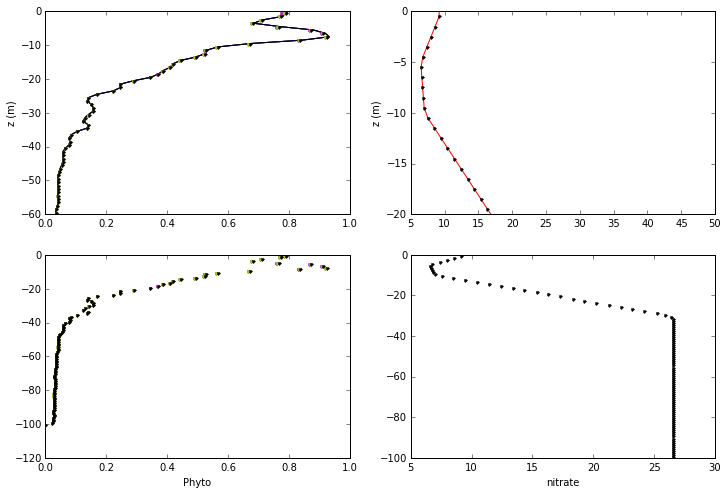

In [4]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
ti=0 # hrs since start
tfac=1 # factor for converting output interval to hours

# Phyto
iii=4
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
iii=5
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='g')
iii=6
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='b')
iii=7
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='k')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['PHY2'][:,:,:,:] # diatoms
pl3=axs[1,0].plot(ivar1[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['PHY'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['MYRI'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='y')
ivar4=f.variables['MICZ'][:,:,:,:]
pl4=axs[1,0].plot(ivar4[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='k')
pl4=axs[0,0].plot(ivar4[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='k')
axs[0,0].set_ylim([-60,0])

# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,ti],-z,'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[tfac*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[tfac*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


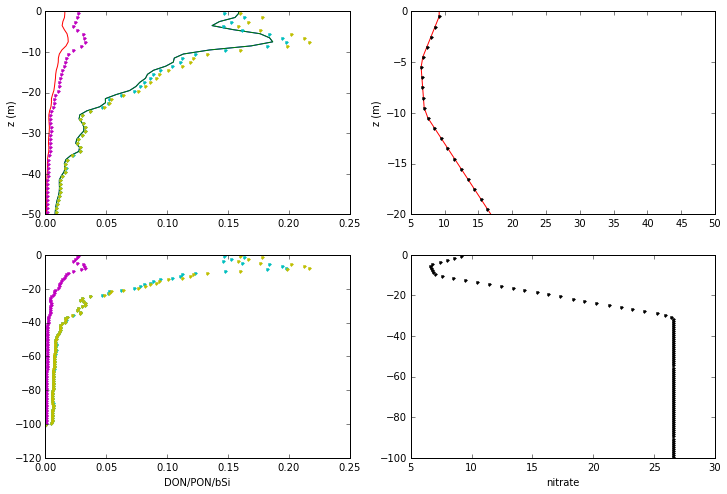

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Phyto
iii=16
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
iii=17
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='b')
iii=19
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='g')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('DON/PON/bSi')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['DOC'][:,:,:,:]/7.6 
pl3=axs[1,0].plot(ivar1[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['POC'][:,:,:,:]/7.6
pl3=axs[1,0].plot(ivar2[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['bSi'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[tfac*ti,0:101,2,2],-zSS[0:101],'.',color='y')
axs[0,0].set_ylim([-50,0])
# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,ti],-z,'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[tfac*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[tfac*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


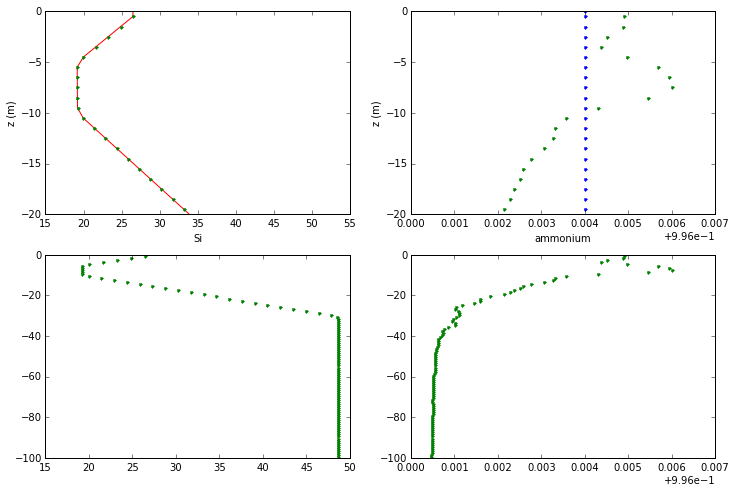

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Si
iii=10
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
axs[0,0].set_ylabel('z (m)')
axs[0,0].set_xlabel('Si')
axs[0,0].set_ylim([-20,0])
#pl0=axs[0,0].plot(f2.variables['Si'][0,0:101,2,2],-zSS[0:101],'-',color='k')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['Si'][:,:,:,:]
pl3=axs[1,0].plot(ivar[tfac*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,0].plot(ivar[tfac*ti,0:100,2,2],-zSS[0:100],'.',color='g')

# NH4
iii=9
pl0=axs[0,1].plot(da[:,iii,ti],-z,'.',color='b')
#pl0=axs[0,1].plot(f2.variables['NH4'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_xlabel(field_names[iii])
axs[0,1].set_ylim([-20,0])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NH4'][:,:,:,:]
pl3=axs[1,1].plot(ivar[tfac*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,1].plot(ivar[tfac*ti,0:100,2,2],-zSS[0:100],'.',color='g')
#axs[0,1].set_xlim([.8,1.2])

In [8]:
ivar1=f.variables['PHY2'][:,:,:,:] # diatoms
print (ivar1[0,0:101,2,2])


[ 0.77290124  0.76621842  0.70431912  0.67415786  0.75821549  0.86521924
  0.90385479  0.91678119  0.83134425  0.66570175  0.5594036   0.52213895
  0.51769853  0.48749346  0.4393836   0.41471812  0.40598592  0.38335028
  0.36804584  0.34243724  0.28832787  0.24517944  0.24489066  0.22178166
  0.16961318  0.14122666  0.13774045  0.14957495  0.15700987  0.15583733
  0.14127864  0.12853822  0.12461609  0.13898002  0.13639198  0.10431755
  0.08400524  0.07764047  0.08013033  0.07648387  0.0652395   0.05700906
  0.05675327  0.0574471   0.05636665  0.05302739  0.0477003   0.04440308
  0.04158911  0.04006312  0.03958859  0.03958261  0.04035836  0.03981156
  0.03953169  0.03976973  0.03999606  0.03919231  0.0354811   0.03301395
  0.03317501  0.03403935  0.03368422  0.03324217  0.03366322  0.03447208
  0.03408618  0.03198526  0.03017014  0.0303065   0.02988859  0.0292789
  0.029236    0.02993138  0.03037092  0.02999499  0.03047689  0.0309063
  0.03045282  0.02796296  0.02749348  0.02773235  0.0

In [9]:
f.close()
f2.close()